In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Section I : Data Loading

Part I : Load the dataset into the notebook

In [ ]:
data = pd.read_csv("/content/bank-full.csv", delimiter=';')
data.head()
df = data.copy()

Part II : Explore and make note of Attribute Information from UCI

In [ ]:
print(data.shape)
print(data.isna().sum())

(45211, 17)
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?

In [ ]:
print('value of column y - has the client subscribed a term deposit? (binary: yes,no)')

value of column y - has the client subscribed a term deposit? (binary: yes,no)


Part IV : What is the ratio of the two classes ? Are they balanced ?

In [ ]:
data['y'].value_counts()
#39922+5289=45211

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Section II : Data Cleaning

Part I : Get the dtypes of all the columns of our dataset

In [ ]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors

In [ ]:
cols = data.columns
cols

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
for col in cols:
  print(col)
  print(data[col].value_counts())
  print('\n')

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64


job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


default
no     44396
yes      815
Name: default, dtype: int64


balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64


housing
yes    25130
no     20081
Name: housing, dty

In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data['duration'].value_counts('188')

124     0.004158
90      0.004070
89      0.003915
104     0.003871
122     0.003871
          ...   
1833    0.000022
1545    0.000022
1352    0.000022
1342    0.000022
1556    0.000022
Name: duration, Length: 1573, dtype: float64

Part III : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data 

Converting columns to int

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['y'])
data['y'] = label_encoder.transform(data['y'])

label_encoder.fit(data['job'])
data['job'] = label_encoder.transform(data['job'])
label_encoder.fit(data['marital'])
data['marital'] = label_encoder.transform(data['marital'])
label_encoder.fit(data['education'])
data['education'] = label_encoder.transform(data['education'])
label_encoder.fit(data['default'])
data['default'] = label_encoder.transform(data['default'])
label_encoder.fit(data['housing'])
data['housing'] = label_encoder.transform(data['housing'])
label_encoder.fit(data['loan'])
data['loan'] = label_encoder.transform(data['loan'])
label_encoder.fit(data['contact'])
data['contact'] = label_encoder.transform(data['contact'])
label_encoder.fit(data['month'])
data['month'] = label_encoder.transform(data['month'])
label_encoder.fit(data['poutcome'])
data['poutcome'] = label_encoder.transform(data['poutcome'])

data.head(20)
data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

Part IV : Print the cleaned data

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


## Section III : Exploring data with Group by

In this section , we must create some primitive EDA

Use the groupby function on the mean of the following columns :

I : y
II : job
III : marital
IV : education

In [ ]:
data.groupby('y').mean()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
0,40.838986,4.291594,1.157632,1.206778,0.019112,1303.714969,0.581008,0.169330,0.688743,15.892290,5.549797,221.182806,2.846350,36.421372,0.502154,2.587997
1,41.670070,4.703347,1.243902,1.360938,0.009832,1804.267915,0.365854,0.091511,0.274154,15.158253,5.320855,537.294574,2.141047,68.702968,1.170354,2.348459


In [ ]:
data.groupby('job').mean()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,,
0,39.289886,1.189132,1.136337,0.014311,1135.838909,0.615355,0.191646,0.646877,15.564301,5.837942,246.896732,2.575324,47.859021,0.671630,2.494295,0.122027
1,40.044081,1.129881,0.722462,0.020654,1078.826654,0.724209,0.173037,0.877620,15.442561,6.040177,262.901562,2.816995,44.033498,0.505138,2.573161,0.072750
2,42.190989,1.039677,1.440484,0.036987,1521.470074,0.584398,0.239408,0.658373,15.702085,6.135844,256.309348,2.799597,32.486214,0.478144,2.601883,0.082717
3,46.415323,0.967742,0.706452,0.017742,1392.395161,0.320968,0.122581,0.671774,16.002419,4.869355,245.825000,2.820968,21.505645,0.371774,2.700000,0.087903
4,40.449567,1.194121,1.844893,0.017340,1763.616832,0.494608,0.132480,0.465532,16.114189,5.186615,253.995771,2.864348,38.665468,0.668006,2.544830,0.137556
5,61.626767,0.859982,0.915636,0.011484,1984.215106,0.216873,0.136484,0.610866,15.439488,5.203180,287.361307,2.346731,37.443905,0.638693,2.545053,0.227915
6,40.484484,1.193794,1.494617,0.020899,1647.970868,0.484484,0.145028,0.564915,16.027866,5.587714,268.157061,2.853072,34.747308,0.551615,2.574414,0.118429
7,38.740250,1.156235,1.037795,0.018055,997.088108,0.665864,0.201252,0.742417,15.635532,5.889986,259.318729,2.718344,41.995185,0.501204,2.573664,0.088830
8,26.542644,1.929638,1.538380,0.003198,1388.060768,0.265458,0.012793,0.408316,14.897655,5.494670,246.656716,2.299574,57.041578,0.953092,2.360341,0.286780


In [ ]:
data.groupby('marital').mean()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
marital,,,,,,,,,,,,,,,,
0,45.782984,4.452084,1.202996,0.024582,1178.872287,0.558287,0.176877,0.670444,15.796428,5.744191,262.517188,2.630882,41.001728,0.551373,2.564817,0.119455
1,43.408099,4.091607,1.151099,0.016462,1425.925590,0.562982,0.171235,0.664254,15.854487,5.459616,253.412765,2.842875,37.950467,0.556552,2.574961,0.101235
2,33.703440,4.822048,1.390539,0.018686,1301.497654,0.539640,0.130023,0.576857,15.708210,5.567866,266.497967,2.649805,44.652385,0.642690,2.526114,0.149492


In [ ]:
data.groupby('education').mean()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
education,,,,,,,,,,,,,,,,
0,45.865567,2.810685,1.014742,0.018537,1250.949934,0.568384,0.149467,0.853014,15.421398,5.764414,255.933002,2.834331,36.081740,0.489272,2.627792,0.086265
1,39.964270,4.477674,1.163865,0.019740,1154.880786,0.605034,0.185458,0.675071,15.759159,5.649427,258.685760,2.700802,42.353504,0.567753,2.551073,0.105594
2,39.593640,4.834298,1.249680,0.014886,1758.416435,0.479513,0.134125,0.443200,16.086535,5.147057,258.518532,2.825577,39.024134,0.661980,2.534922,0.150064
3,44.510501,4.715670,1.193323,0.017232,1526.754443,0.441572,0.071621,0.831449,15.810985,5.745827,257.313947,2.849219,36.856220,0.488422,2.600431,0.135703


## Section III : Exploratory Data Analysis

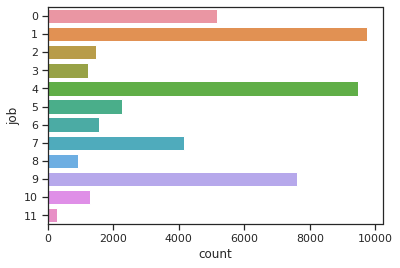

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)

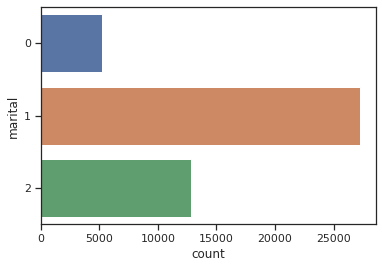

In [ ]:
sns.countplot(y='marital', data=data)

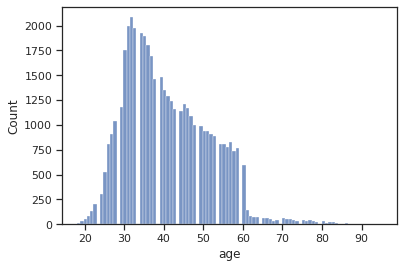

In [ ]:
sns.histplot(data['age'])
plt.show()

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(data,hue="y",size=3);
plt.show()

Output hidden; open in https://colab.research.google.com to view.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e07aa9310>,
      dtype=object)

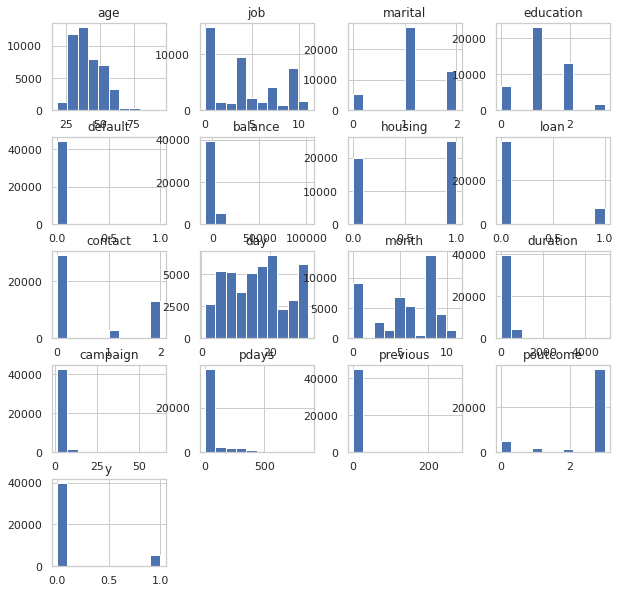

In [ ]:
data.hist(figsize=(10,10))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred = model.predict(x_test)
print(pred)
print()
print(classification_report(y_test,pred))

[0 0 1 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7997
           1       0.61      0.20      0.30      1046

    accuracy                           0.89      9043
   macro avg       0.76      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



In [ ]:
print( "The accuracy of the Model",accuracy_score(y_test, pred))

The accuracy of the Model 0.8925135463894726
